# Planar Straight-Line Graph & Doubly-Connected Edge List

## Введение

#### Откуда возникает задача

Для того, чтобы лучше понимать, о чём пойдёт речь, представим себе некоторую карту местности.Она может быть совершенно любой. На ней могут быть отмечены реки, железнодорожные маршруты, точки с названиями населённых пунктов и так далее. 
Пусть мы захотели найти на карте некоторый населённый пункт, тогда нанесённые на карту названия рек будут нас только отвлекать. Поэтому, чтобы такой проблемы не возникало, в географических системах карты делят на тематические слои. Например, один слой содержит только дороги, другой слой только реки и так далее. Каждый слой содержит только один тип информации, при этом по смыслу эта информация может быть совершенно любой.
С геометрической точки зрения, слои могут быть совершенно разными. Например, слой с дорогами представляет собой множество отрезков, а слой с городами будет простым множеством точек. А если разбить некоторый город на районы, то они будут представлять собой разбиение карты на области. 

Люди, которые пользуются такой системой карт со слоями, могут довольно легко найти то, что им нужно. Допустим, человеку нужно проложить маршрут между двумя городами. Тогда сначала он открывает слой с городами, находит нужные ему, а потом открывает слой с дорогами и ищет маршрут между ними. 
Современные системы такого типа позволяют ещё и брать пересечения нескольких слоёв. Допустим, что у нас есть слой дорог и слой рек. Тогда пересечение этих слоёв будет представлять собой множество мостов. 

#### Постановка задачи

Слои на рассматриваемой карте могут быть совершенно любыми. Как самый тривиальный пример, можно взять два слоя, каждый из которых является набором отрезков. Тогда пересечение таких слоев сводится к задаче пересечения отрезков.
Более общая ситуация, рассматриваемая в данном конспекте, когда слои представляют собой разбиение плоскости на некоторые области. И прежде чем работать с такими областями, нужно разработать некоторую удобную для этого структуру. Хранить области в виде набора отрезков - не очень хорошая идея, так как некоторые операции (например, запрос границы области) будут выполняться достаточно долго. Намного удобнее хранить некоторую структурную, топологическую информацию: какие отрезки принадлежат данной области, какие области смежны друг с другом и так далее.
Итого, задача которую мы хотим решить - это построение удобной структуры для работы с некоторыми областями на плоскости. 

## Определения

**ППЛГ** (англ. _PSLG_) - Плоский (планарный) прямолинейный граф. Граф называется планарным, если его можно нарисовть на плоскости так, чтобы его ребра не пересекались. Планарный граф называется прямолинейным, если каждое его ребро - это прямая линия.

**Разбиение плоскости** - некоторе разделение плоскости на области. Заметим, что любой планарный граф порождает некоторе разбиение плоскости.

**Область** (англ. _face_) - пусть дан PSLG. Тогда _face_ - это множество точек, которое ограничено по периметру рёбрами графа.

**РСДС** (англ. _DCEL_) - реберный список с двойными связями. Реберный список с двойными связями особенно удобен для представления PSLG.

### Описание DCEL

#### Формальное: 
Пусть задан граф _G = (V, E)_, _V = {$v_1$, $v_2$, ... $v_n$}_, _E = {$e_1$, $e_2$, ... $e_m$}_. Главная компонента DCEL для планарного графа это реберный узел. Между ребрами графа и реберными узлами DCEL существует биективное отображение, т.е. каждое ребро однозначно представлено в DCEL ровно один раз. Реберный узел DCEL, соответствующий ребру графа, например, $e_k$ = {$v_i$, $v_j$} имеет 4 поля ($v_1$, $v_2$, $f_1$, $f_2$) и 2 указателя ($p_1$, $p_2$). Поле $v_1$ содержит начало ребра, а поле $v_2$ содержит его конец (так изначально неориентированное ребро получает условную ориентацию). Поля $f_1$ и $f_2$ содержат имена граней, лежащих слева и справа от ориентированного ребра ($v_1$, $v_2$). Указатель $p_1$ (и, соответственно, $p_2$) задает реберный узел, содержащий первое ребро, встречаемое вслед за ребром ($v_1$, $v_2$), при повороте от него против часовой стрелки вокруг $v_1$ (и, соответственно, $v_2$).

#### Нефромальное:

DCEL состоит из трех компонент:
1. _Vertex_ - вершина. Содержит координаты точки, а также указатель на инцидентное ребро.
2. _Face_ - область. Содержит указатель на некоторое ребро на его границе. Для неограниченных поверхностей это nil. Также содержит список указателей на внутренние компоненты (дырки), то есть, по указателю на одно из инцидентных каждой дырке рёбер (nil, если дырок нет).
3. _HalfEdge_ - ребро (полуребро). Содержит указатель на вершину, откуда исходит (origin), указатель на ребро близнец, направленное в другую сторону (twin), инцидентную поверхность (incident_face), и указатели на следующее и предыдущее ребра.


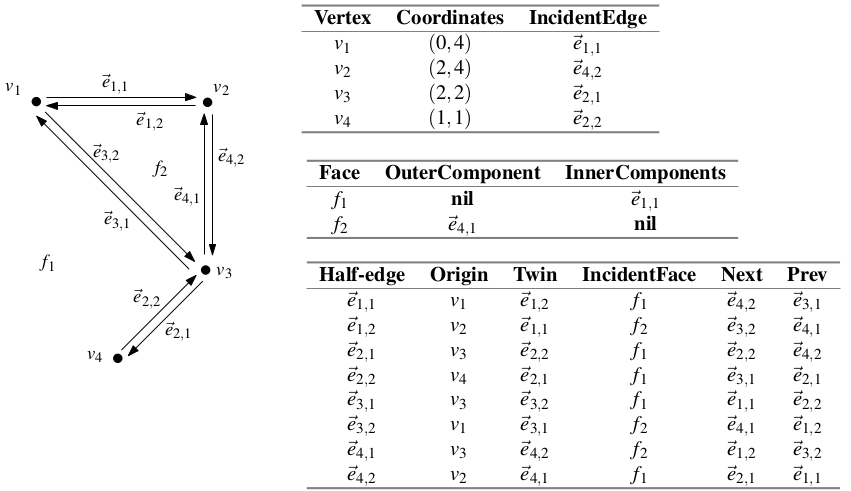



## Применение 

Итак, мы сказали, что разбиение плоскости может быть порождено планарным прямолинейным графом. То есть, сам граф, по сути, уже является структурой, которая может представлять слой в карте. Но от такой структуры пользы будет не очень много. DCEL, в свою очередь, является более удобным представлением, которое позволяет решать различные задачи.

### Пример: получить смежные области для ребра
Для этого достаточно взять инцидетную область для данного ребра и для его близнеца

In [ ]:
def get_incident_faces(half_edge):
    return half_edge.incident_face, half_edge.twin.incident_face

### Пример: перебрать все ребра инцидентные данной вершине по часовой стрелке
Для этого нужно взять ребро, инцидентное данной вершине, из него перейти в twin, потом в next. Повторять, пока не придем в первое ребро.

In [ ]:
def enumerate_edges(vertex):
    start = vertex.incident_edge
    cur = start
    while True:
        cur = cur.twin.next
        if cur == start:
            break

# Построение DCEL множества прямых


//TODO